In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ed = pd.read_csv("BIOFUEL_GEN_PT3.csv", encoding='latin1')
gd = pd.read_excel("BIOFUEL_GEN_PT3.xlsx")

In [5]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    525 non-null    object 
 1   County                                  517 non-null    object 
 2   Digester Type                           525 non-null    object 
 3   Animal/Farm Type(s)                     526 non-null    object 
 4   Dairy                                   422 non-null    float64
 5   Biogas Generation Estimate (cu-ft/day)  524 non-null    float64
 6   Electricity Generated (kWh/yr)          242 non-null    object 
 7   Biogas End Use(s)                       518 non-null    object 
 8   CO2 Emission by Biofuel (g/hr)          422 non-null    float64
 9   CO2 Emissions by Fossil Fuels (g/hr)    526 non-null    int64  
 10  Total Emission Reduction(g/hr)          526 non-null    int64 

In [6]:
ed.shape

(526, 11)

In [7]:
ed.head()

,City,County,Digester Type,Animal/Farm Type(s),Dairy,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),CO2 Emission by Biofuel (g/hr),CO2 Emissions by Fossil Fuels (g/hr),Total Emission Reduction(g/hr)
0,Morrilton,Conway,Covered Lagoon,Dairy,12300.0,1402200.0,NaN,Flared Full-time,134.0,196,62
1,Buckeye,Maricopa,Mixed Plug Flow,Dairy,11760.0,1093680.0,NaN,Pipeline Gas,78.0,221,143
2,Eloy,Pinal,Unknown or Unspecified,Dairy,8800.0,924000.0,NaN,Pipeline Gas,159.0,136,-23
3,Maricopa,Pinal,Complete Mix,Dairy,30000.0,3600000.0,NaN,Pipeline Gas,112.0,255,143
4,Gila Bend,Maricopa,Complete Mix,Dairy,10000.0,1200000.0,NaN,CNG,144.0,244,100


In [9]:
ed.describe()

,Dairy,Biogas Generation Estimate (cu-ft/day),CO2 Emission by Biofuel (g/hr),CO2 Emissions by Fossil Fuels (g/hr),Total Emission Reduction(g/hr)
count,422.000000,5.240000e+02,422.000000,526.000000,526.000000
mean,4152.367299,3.685063e+05,133.850711,265.836502,132.498099
std,5161.506497,5.533679e+05,24.869521,66.828821,68.124249
min,30.000000,0.000000e+00,71.000000,110.000000,-30.000000
25%,1032.750000,4.500000e+04,121.000000,214.000000,83.000000
50%,2500.000000,1.945500e+05,138.000000,258.000000,129.000000
75%,5700.000000,5.130900e+05,153.750000,308.000000,176.000000
max,39000.000000,4.446000e+06,169.000000,488.000000,351.000000


In [11]:
ed.isnull().sum()

,0
City,1
County,9
Digester Type,1
Animal/Farm Type(s),0
Dairy,104
Biogas Generation Estimate (cu-ft/day),2
Electricity Generated (kWh/yr),284
Biogas End Use(s),8
CO2 Emission by Biofuel (g/hr),104
CO2 Emissions by Fossil Fuels (g/hr),0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
fd = ed.dropna(subset=["Dairy"])

In [14]:
x = pd.DataFrame(fd['Dairy'])
y = fd['Biogas Generation Estimate (cu-ft/day)']

In [15]:
x_Train,x_Test,y_Train,y_Test= train_test_split(x,y, test_size=0.15, random_state=360)

In [16]:
# Combine x_Train and y_Train to easily drop rows with NaN in y_Train
train_data = pd.concat([x_Train, y_Train], axis=1)

# Drop rows where the target variable (y_Train) is NaN
train_data_cleaned = train_data.dropna(subset=[y_Train.name])

# Separate the cleaned data back into x_Train and y_Train
x_Train_cleaned = train_data_cleaned[x_Train.columns]
y_Train_cleaned = train_data_cleaned[y_Train.name]

model = LinearRegression()
model.fit(x_Train_cleaned, y_Train_cleaned)

LinearRegression()

In [17]:
y_pred = model.predict(x_Test)

In [18]:
mse = mean_squared_error(y_Test, y_pred)
r2 = r2_score(y_Test, y_pred)
print ("Mean Squared Error:", mse)
print ("R-squared:", r2)

Mean Squared Error: 10892724085.18005
R-squared: 0.9798211409259671


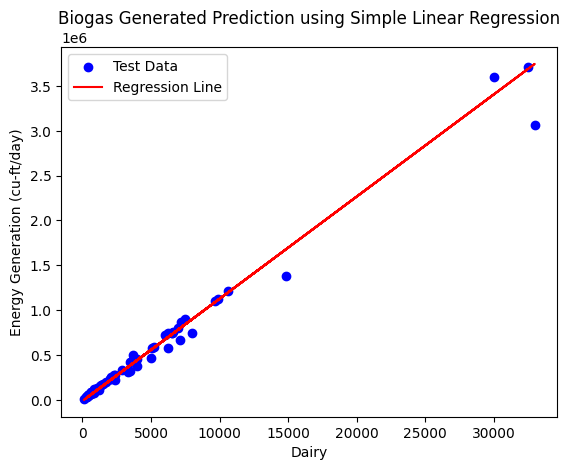

In [19]:
plt.scatter(x_Test, y_Test, color='blue', label='Test Data')
plt.plot(x_Test, y_pred, color="red", label='Regression Line')
plt.xlabel('Dairy')
plt.ylabel("Energy Generation (cu-ft/day)")
plt.legend()
plt.title('Biogas Generated Prediction using Simple Linear Regression')
plt.show()

In [20]:
import joblib

# save the trained model
joblib.dump(model, "model.pkl")

['model.pkl']

In [23]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.0 MB/s eta 0:00:00


In [24]:
import streamlit as st
import joblib
import numpy as np

In [25]:
import streamlit as st
import joblib
import numpy as np
# Load your trained model
model = joblib.load("model.pkl")  # Make sure model.pkl is in the same folder

st.title("🚀 Biofuel Energy Genreation Prediction App")
st.write("Enter the details below to predict CO2 emission:")

# Example input fields (replace with your actual dataset features)
Dairy = st.number_input(" Dairy", min_value=0.0, step=0.1)

# Convert to numpy array
input_data = np.array([[Dairy]])

if st.button("Predict Energy Generation"):
    prediction = model.predict(input_data)
    st.success(f"🌍 Estimated Biofuel Energy Genration: {prediction[0]:.2f} cu-ft")

2025-09-14 06:52:19.360 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:52:19.514 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-14 06:52:19.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:52:19.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:52:19.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:52:19.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:52:19.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:52:19.520 Thread 'MainThread': mi

In [27]:
import streamlit as st
import joblib
import numpy as np
# Load your trained model
model = joblib.load("model.pkl")  # Make sure model.pkl is in the same folder

st.title("🚀 Biofuel Energy Genreation Prediction App")
st.write("Enter the details below to predict CO2 emission:")

# Example input fields (replace with your actual dataset features)
Dairy = st.number_input(" Dairy", min_value=0.0, step=0.1)

# Convert to numpy array
input_data = np.array([[Dairy]])

if st.button("Predict Energy Generation"):
    prediction = model.predict(input_data)
    st.success(f"🌍 Estimated Biofuel Energy Genration: {prediction[0]:.2f} cu-ft")

2025-09-14 06:53:17.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:53:17.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:53:17.915 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:53:17.916 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:53:17.917 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:53:17.917 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:53:17.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 06:53:17.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar